In [1]:
import numpy as np
import pandas as pd

In [109]:
df = pd.read_csv("data/faq.csv")
df.rename(columns={'section': 'section0', 'article': 'section1'}, inplace=True)
df['text'] = df['text'].str.strip()
df['text_len'] = df['text'].str.len()
df['text_word_count'] = df['text'].str.split().apply(lambda x: len(x))
df

,Unnamed: 0,section0,section1,text,artlicle_link,text_len,text_word_count
0,0,"Tasks, Folders, Projects and Spaces",Tasks,Tasks\n \nFollow\n\n\n\nExternal and Re...,https://help.wrike.com/hc/en-us/articles/20960...,7134,1278
1,1,"Tasks, Folders, Projects and Spaces",Tasks,Task View\n \nFollow\n\n\n\n⏱ 1 min rea...,https://help.wrike.com/hc/en-us/articles/21032...,623,80
2,2,"Tasks, Folders, Projects and Spaces",Tasks,Subtasks\n \nFollow\n\n\n\nSubtasks are...,https://help.wrike.com/hc/en-us/articles/21032...,7902,1421
3,3,"Tasks, Folders, Projects and Spaces",Tasks,Subtask Alignment \n \nFollow\n\n\n\n⏱ ...,https://help.wrike.com/hc/en-us/articles/11500...,4649,776
4,4,"Tasks, Folders, Projects and Spaces",Tasks,Attachments\n \nFollow\n\n\n\nAll users...,https://help.wrike.com/hc/en-us/articles/20960...,8693,1463
...,...,...,...,...,...,...,...
225,225,Security,More Security Features,Account Backup\n \nFollow\n\n\n\nAccoun...,https://help.wrike.com/hc/en-us/articles/20960...,9685,1397
226,226,Security,More Security Features,2-Step Verification\n \nFollow\n\n\n\n2...,https://help.wrike.com/hc/en-us/articles/21032...,7327,1112
227,227,Apps,Desktop,Wrike for Windows and Mac (Desktop App)\n ...,https://help.wrike.com/hc/en-us/articles/11500...,6054,951
228,228,Apps,Mobile,iOS App\n \nFollow\n\n\n\n\n⏱ 3.5 min r...,https://help.wrike.com/hc/en-us/articles/20960...,8434,1408


In [110]:
import re

deprecated_secition3 = {'Overview', 'Important Information'}

def extract_header(text):
    text = re.sub(' +', ' ', text)
    header = []
    start_header = False
    for i, line in enumerate(text.split('\n')):
        line = line.strip()
        if line in header:
            break
        if line and start_header and line not in deprecated_secition3 \
           and '.' not in line:
            header.append(line)
        if not start_header and line.endswith(' min read'):
            start_header = True
    return header

for i in range(40):
    print(extract_header(df['text'].values[i]))

['Create a Task', 'Assign a Task', 'Schedule a Task', 'Tag a Task (Organize Tasks into Folders)', 'Follow a Task', 'Unfollow a Task', 'Print a Task', 'Add Dependencies to a Task', 'Viewing Tasks']
['Navigate the Task View']
['Create a Subtask', "View a Task's Subtasks", 'Edit Subtasks', 'Convert a Task into a Subtask', 'Convert a Subtask into a Task', 'Add a Subtask to Multiple Parent Tasks', "Change a Subtask's Parent Task", 'Reorder Subtasks on the List View', 'Use subtasks to:']
['Expanding Parent Task Dates', 'Shifting Task Dates', 'Exceptions', 'Disable Alignment Pop-Up', 'Wrike asks if you want to align dates in two scenarios:']
['Attach a File', 'Edit Attached Files', 'Create a Google Drive File From Wrike', 'Download Attachments', 'Delete Attachments', 'More Info', 'You can:']
['Create a Milestone Task', 'Milestones on the Gantt Chart']
['Convert a Scheduled Task into a Backlogged Task', 'Filter Folders to see Backlogged Tasks']
['Sorting Options', 'Change How Tasks are Sorted'

In [117]:
df['section2_header'] = df['text'].apply(extract_header)
df

,Unnamed: 0,section0,section1,text,artlicle_link,text_len,text_word_count,section2_header,section01_path
0,0,"Tasks, Folders, Projects and Spaces",Tasks,Tasks\n \nFollow\n\n\n\nExternal and Re...,https://help.wrike.com/hc/en-us/articles/20960...,7134,1278,"[Create a Task, Assign a Task, Schedule a Task...","Tasks, Folders, Projects and Spaces/Tasks"
1,1,"Tasks, Folders, Projects and Spaces",Tasks,Task View\n \nFollow\n\n\n\n⏱ 1 min rea...,https://help.wrike.com/hc/en-us/articles/21032...,623,80,[Navigate the Task View],"Tasks, Folders, Projects and Spaces/Tasks"
2,2,"Tasks, Folders, Projects and Spaces",Tasks,Subtasks\n \nFollow\n\n\n\nSubtasks are...,https://help.wrike.com/hc/en-us/articles/21032...,7902,1421,"[Create a Subtask, View a Task's Subtasks, Edi...","Tasks, Folders, Projects and Spaces/Tasks"
3,3,"Tasks, Folders, Projects and Spaces",Tasks,Subtask Alignment \n \nFollow\n\n\n\n⏱ ...,https://help.wrike.com/hc/en-us/articles/11500...,4649,776,"[Expanding Parent Task Dates, Shifting Task Da...","Tasks, Folders, Projects and Spaces/Tasks"
4,4,"Tasks, Folders, Projects and Spaces",Tasks,Attachments\n \nFollow\n\n\n\nAll users...,https://help.wrike.com/hc/en-us/articles/20960...,8693,1463,"[Attach a File, Edit Attached Files, Create a ...","Tasks, Folders, Projects and Spaces/Tasks"
...,...,...,...,...,...,...,...,...,...
225,225,Security,More Security Features,Account Backup\n \nFollow\n\n\n\nAccoun...,https://help.wrike.com/hc/en-us/articles/20960...,9685,1397,"[What Data is Backed up, Perform an Account Ba...",Security/More Security Features
226,226,Security,More Security Features,2-Step Verification\n \nFollow\n\n\n\n2...,https://help.wrike.com/hc/en-us/articles/21032...,7327,1112,"[Authentication Apps, Enable 2-Step Verificati...",Security/More Security Features
227,227,Apps,Desktop,Wrike for Windows and Mac (Desktop App)\n ...,https://help.wrike.com/hc/en-us/articles/11500...,6054,951,"[Compatible Operating Systems, Install Wrike's...",Apps/Desktop
228,228,Apps,Mobile,iOS App\n \nFollow\n\n\n\n\n⏱ 3.5 min r...,https://help.wrike.com/hc/en-us/articles/20960...,8434,1408,"[Navigate the App, Customize the Bottom Panel,...",Apps/Mobile


In [112]:
df.sort_values('text_word_count')

,Unnamed: 0,section0,section1,text,artlicle_link,text_len,text_word_count,section2_header
1,1,"Tasks, Folders, Projects and Spaces",Tasks,Task View\n \nFollow\n\n\n\n⏱ 1 min rea...,https://help.wrike.com/hc/en-us/articles/21032...,623,80,[Navigate the Task View]
212,212,Account Management,Billing,Print an Invoice\n \nFollow\n\n\n\nAcco...,https://help.wrike.com/hc/en-us/articles/21032...,877,113,[If you are an owner of multiple accounts: cli...
181,181,Account Management,General Account Management,Wrike Bot\n \nFollow\n\n\n\n⏱ 1 min rea...,https://help.wrike.com/hc/en-us/articles/11500...,866,117,[Other places you may see the Wrike Bot pop-up...
196,196,Account Management,Personal User License,Workweek Settings\n \nFollow\n\n\n\n⏱ 1...,https://help.wrike.com/hc/en-us/articles/36000...,929,121,[Change the First Day of the Week]
192,192,Account Management,General Account Management,Close an Account\n \nFollow\n\n\n\n⏱ 1 ...,https://help.wrike.com/hc/en-us/articles/21281...,1004,134,"[Free Accounts, All Other Accounts]"
...,...,...,...,...,...,...,...,...
126,126,Monitoring Panel,More Monitoring Panel Views,Dashboard Widgets\n \nFollow\n\n\n\nReg...,https://help.wrike.com/hc/en-us/articles/11500...,13095,2167,"[Create Widgets from Templates, Available Widg..."
94,94,Work Views,Table View,Table View\n \nFollow\n\n\n\nTable view...,https://help.wrike.com/hc/en-us/articles/36000...,12987,2233,"[Perks of Table View, Navigate the View, Sorti..."
137,137,Integrations,Email,Email Integration\n \nFollow\n\n\n\nAll...,https://help.wrike.com/hc/en-us/articles/21032...,13671,2347,"[Settings (Before You Start), Create a Task vi..."
100,100,Monitoring Panel,Wrike Analyze,Wrike Analyze\n \nFollow\n\n\n\nWrike A...,https://help.wrike.com/hc/en-us/articles/36003...,16693,2744,[]


In [113]:
df['section01_path'] = df['section0'] + '/' + df['section1']
df

,Unnamed: 0,section0,section1,text,artlicle_link,text_len,text_word_count,section2_header,section01_path
0,0,"Tasks, Folders, Projects and Spaces",Tasks,Tasks\n \nFollow\n\n\n\nExternal and Re...,https://help.wrike.com/hc/en-us/articles/20960...,7134,1278,"[Create a Task, Assign a Task, Schedule a Task...","Tasks, Folders, Projects and Spaces/Tasks"
1,1,"Tasks, Folders, Projects and Spaces",Tasks,Task View\n \nFollow\n\n\n\n⏱ 1 min rea...,https://help.wrike.com/hc/en-us/articles/21032...,623,80,[Navigate the Task View],"Tasks, Folders, Projects and Spaces/Tasks"
2,2,"Tasks, Folders, Projects and Spaces",Tasks,Subtasks\n \nFollow\n\n\n\nSubtasks are...,https://help.wrike.com/hc/en-us/articles/21032...,7902,1421,"[Create a Subtask, View a Task's Subtasks, Edi...","Tasks, Folders, Projects and Spaces/Tasks"
3,3,"Tasks, Folders, Projects and Spaces",Tasks,Subtask Alignment \n \nFollow\n\n\n\n⏱ ...,https://help.wrike.com/hc/en-us/articles/11500...,4649,776,"[Expanding Parent Task Dates, Shifting Task Da...","Tasks, Folders, Projects and Spaces/Tasks"
4,4,"Tasks, Folders, Projects and Spaces",Tasks,Attachments\n \nFollow\n\n\n\nAll users...,https://help.wrike.com/hc/en-us/articles/20960...,8693,1463,"[Attach a File, Edit Attached Files, Create a ...","Tasks, Folders, Projects and Spaces/Tasks"
...,...,...,...,...,...,...,...,...,...
225,225,Security,More Security Features,Account Backup\n \nFollow\n\n\n\nAccoun...,https://help.wrike.com/hc/en-us/articles/20960...,9685,1397,"[What Data is Backed up, Perform an Account Ba...",Security/More Security Features
226,226,Security,More Security Features,2-Step Verification\n \nFollow\n\n\n\n2...,https://help.wrike.com/hc/en-us/articles/21032...,7327,1112,"[Authentication Apps, Enable 2-Step Verificati...",Security/More Security Features
227,227,Apps,Desktop,Wrike for Windows and Mac (Desktop App)\n ...,https://help.wrike.com/hc/en-us/articles/11500...,6054,951,"[Compatible Operating Systems, Install Wrike's...",Apps/Desktop
228,228,Apps,Mobile,iOS App\n \nFollow\n\n\n\n\n⏱ 3.5 min r...,https://help.wrike.com/hc/en-us/articles/20960...,8434,1408,"[Navigate the App, Customize the Bottom Panel,...",Apps/Mobile


In [114]:
len(df['artlicle_link'].unique()), len(df['section01_path'].unique())

(230, 33)

In [115]:
df

,Unnamed: 0,section0,section1,text,artlicle_link,text_len,text_word_count,section2_header,section01_path
0,0,"Tasks, Folders, Projects and Spaces",Tasks,Tasks\n \nFollow\n\n\n\nExternal and Re...,https://help.wrike.com/hc/en-us/articles/20960...,7134,1278,"[Create a Task, Assign a Task, Schedule a Task...","Tasks, Folders, Projects and Spaces/Tasks"
1,1,"Tasks, Folders, Projects and Spaces",Tasks,Task View\n \nFollow\n\n\n\n⏱ 1 min rea...,https://help.wrike.com/hc/en-us/articles/21032...,623,80,[Navigate the Task View],"Tasks, Folders, Projects and Spaces/Tasks"
2,2,"Tasks, Folders, Projects and Spaces",Tasks,Subtasks\n \nFollow\n\n\n\nSubtasks are...,https://help.wrike.com/hc/en-us/articles/21032...,7902,1421,"[Create a Subtask, View a Task's Subtasks, Edi...","Tasks, Folders, Projects and Spaces/Tasks"
3,3,"Tasks, Folders, Projects and Spaces",Tasks,Subtask Alignment \n \nFollow\n\n\n\n⏱ ...,https://help.wrike.com/hc/en-us/articles/11500...,4649,776,"[Expanding Parent Task Dates, Shifting Task Da...","Tasks, Folders, Projects and Spaces/Tasks"
4,4,"Tasks, Folders, Projects and Spaces",Tasks,Attachments\n \nFollow\n\n\n\nAll users...,https://help.wrike.com/hc/en-us/articles/20960...,8693,1463,"[Attach a File, Edit Attached Files, Create a ...","Tasks, Folders, Projects and Spaces/Tasks"
...,...,...,...,...,...,...,...,...,...
225,225,Security,More Security Features,Account Backup\n \nFollow\n\n\n\nAccoun...,https://help.wrike.com/hc/en-us/articles/20960...,9685,1397,"[What Data is Backed up, Perform an Account Ba...",Security/More Security Features
226,226,Security,More Security Features,2-Step Verification\n \nFollow\n\n\n\n2...,https://help.wrike.com/hc/en-us/articles/21032...,7327,1112,"[Authentication Apps, Enable 2-Step Verificati...",Security/More Security Features
227,227,Apps,Desktop,Wrike for Windows and Mac (Desktop App)\n ...,https://help.wrike.com/hc/en-us/articles/11500...,6054,951,"[Compatible Operating Systems, Install Wrike's...",Apps/Desktop
228,228,Apps,Mobile,iOS App\n \nFollow\n\n\n\n\n⏱ 3.5 min r...,https://help.wrike.com/hc/en-us/articles/20960...,8434,1408,"[Navigate the App, Customize the Bottom Panel,...",Apps/Mobile


In [119]:
print(df.shape)
df_expand = df.explode('section2_header')
print(df_expand.shape)
df_expand['section012_path'] = df_expand.apply(
    lambda x: f"{x['section0']}/{x['section1']}/{x['section2_header']}",
    axis=1
)

(230, 9)
(982, 9)


In [116]:
df_expand

,Unnamed: 0,section0,section1,text,artlicle_link,text_len,text_word_count,section2_header,section01_path,section012_path
0,0,"Tasks, Folders, Projects and Spaces",Tasks,Tasks\n \nFollow\n\n\n\nExternal and Re...,https://help.wrike.com/hc/en-us/articles/20960...,7134,1278,Create a Task,"Tasks, Folders, Projects and Spaces/Tasks","Tasks, Folders, Projects and Spaces/Tasks/Crea..."
0,0,"Tasks, Folders, Projects and Spaces",Tasks,Tasks\n \nFollow\n\n\n\nExternal and Re...,https://help.wrike.com/hc/en-us/articles/20960...,7134,1278,Assign a Task,"Tasks, Folders, Projects and Spaces/Tasks","Tasks, Folders, Projects and Spaces/Tasks/Assi..."
0,0,"Tasks, Folders, Projects and Spaces",Tasks,Tasks\n \nFollow\n\n\n\nExternal and Re...,https://help.wrike.com/hc/en-us/articles/20960...,7134,1278,Schedule a Task,"Tasks, Folders, Projects and Spaces/Tasks","Tasks, Folders, Projects and Spaces/Tasks/Sche..."
0,0,"Tasks, Folders, Projects and Spaces",Tasks,Tasks\n \nFollow\n\n\n\nExternal and Re...,https://help.wrike.com/hc/en-us/articles/20960...,7134,1278,Tag a Task (Organize Tasks into Folders),"Tasks, Folders, Projects and Spaces/Tasks","Tasks, Folders, Projects and Spaces/Tasks/Tag ..."
0,0,"Tasks, Folders, Projects and Spaces",Tasks,Tasks\n \nFollow\n\n\n\nExternal and Re...,https://help.wrike.com/hc/en-us/articles/20960...,7134,1278,Follow a Task,"Tasks, Folders, Projects and Spaces/Tasks","Tasks, Folders, Projects and Spaces/Tasks/Foll..."
...,...,...,...,...,...,...,...,...,...,...
229,229,Apps,Mobile,Android App\n \nFollow\n\n\n\n\n⏱ 3.5 m...,https://help.wrike.com/hc/en-us/articles/21032...,10853,1794,View Reports,Apps/Mobile,Apps/Mobile/View Reports
229,229,Apps,Mobile,Android App\n \nFollow\n\n\n\n\n⏱ 3.5 m...,https://help.wrike.com/hc/en-us/articles/21032...,10853,1794,Submit a Request,Apps/Mobile,Apps/Mobile/Submit a Request
229,229,Apps,Mobile,Android App\n \nFollow\n\n\n\n\n⏱ 3.5 m...,https://help.wrike.com/hc/en-us/articles/21032...,10853,1794,Working Offline,Apps/Mobile,Apps/Mobile/Working Offline
229,229,Apps,Mobile,Android App\n \nFollow\n\n\n\n\n⏱ 3.5 m...,https://help.wrike.com/hc/en-us/articles/21032...,10853,1794,Android Widgets,Apps/Mobile,Apps/Mobile/Android Widgets


In [11]:
wrike_content = """
Best Practices and Cheat Sheets
    Tasks, Folders, Projects and Spaces

        Tasks
        Folders and Projects
        Proofing and Approvals
        Communication
        Advanced
        Organization

    Types of Accounts and Licenses

        Accounts

    Work Views

        Gantt Chart
        Table View
        Timelog View
        All the Other Views

    Monitoring Panel

        Wrike Analyze
        Wrike Resource
        Calendars
        Reporting
        More Monitoring Panel Views
        Automated Monitoring

    Integrations

        Wrike Integrate
        Email
        Add-ins and Extensions
        Import and Export
        Wrike, GitHub, and JIRA Syncs
        Everything Else

    Account Management

        Troubleshooting
        General Account Management
        Personal User License
        Billing

    Security

        Single Sign-On
        More Security Features

    Apps

        Desktop
        Mobile
"""

In [15]:
lines = []
for line in wrike_content.splitlines():
    if line.count('    ') == 1:
        lines.append(line.strip())
        
for line in sorted(lines):
    print(line)
    
print(len(sorted(lines)))

Account Management
Apps
Best Practices and Cheat Sheets
Getting Started
Integrations
Monitoring Panel
Release News
Security
Tasks, Folders, Projects and Spaces
Types of Accounts and Licenses
Work Views
11


In [18]:
for line in sorted(df['section0'].unique()):
    print(line)
print(len(df['section0'].unique()))

Account Management
Apps
Integrations
Monitoring Panel
Security
Tasks, Folders, Projects and Spaces
Types of Accounts and Licenses
Work Views
8


In [21]:
df.to_csv('data/faq_sections.csv', index=False)

In [22]:
df_q = pd.read_csv('data/chatbot_questions.csv')
df_q

,date,date_sec,question
0,2020-08-24 02:35:47,887,how make annual report in wrike?
1,2020-08-23 23:16:32,819,gantt chart
2,2020-08-23 23:29:34,288,action in admin panel
3,2020-08-23 23:30:15,669,admin panel
4,2020-08-24 03:39:03,436,Close project
...,...,...,...
147,2020-08-29 21:14:26,427,move task
148,2020-08-29 21:17:30,639,move task to column
149,2020-08-29 21:17:51,84,move task to another column
150,2020-08-29 21:22:36,391,How to jump from user profile to project setti...


In [23]:
df_q.drop_duplicates('question').to_csv('data/chatbot_questions_filter.csv')

In [26]:
df['artlicle_link'].count()

230

In [34]:
link_dict = {}
for link, section_title in zip(df['artlicle_link'], df['section01_path']):
    link_dict[section_title] = link
    print(section_title, link)

Tasks, Folders, Projects and Spaces/Tasks https://help.wrike.com/hc/en-us/articles/209603709-Tasks
Tasks, Folders, Projects and Spaces/Tasks https://help.wrike.com/hc/en-us/articles/210323225-Task-View
Tasks, Folders, Projects and Spaces/Tasks https://help.wrike.com/hc/en-us/articles/210323245-Subtasks
Tasks, Folders, Projects and Spaces/Tasks https://help.wrike.com/hc/en-us/articles/115005055469-Subtask-Alignment-
Tasks, Folders, Projects and Spaces/Tasks https://help.wrike.com/hc/en-us/articles/209603309-Attachments
Tasks, Folders, Projects and Spaces/Tasks https://help.wrike.com/hc/en-us/articles/209603689-Milestones
Tasks, Folders, Projects and Spaces/Tasks https://help.wrike.com/hc/en-us/articles/210323205-Backlogged-Tasks
Tasks, Folders, Projects and Spaces/Tasks https://help.wrike.com/hc/en-us/articles/210323325-List-View-Sorting-and-Prioritizing-Tasks
Tasks, Folders, Projects and Spaces/Tasks https://help.wrike.com/hc/en-us/articles/209603889-Mass-Editing
Tasks, Folders, Projec

In [35]:
link_dict

{'Tasks, Folders, Projects and Spaces/Tasks': 'https://help.wrike.com/hc/en-us/articles/209603749-Print-Tasks',
 'Tasks, Folders, Projects and Spaces/Folders and Projects': 'https://help.wrike.com/hc/en-us/articles/360010428113-Project-Progress',
 'Tasks, Folders, Projects and Spaces/Spaces': 'https://help.wrike.com/hc/en-us/articles/360021667233-Bookmarks',
 'Tasks, Folders, Projects and Spaces/Proofing and Approvals': 'https://help.wrike.com/hc/en-us/articles/360024472793-Wrike-Publish-Bynder-Integration',
 'Tasks, Folders, Projects and Spaces/Communication': 'https://help.wrike.com/hc/en-us/articles/209602929-Following',
 'Tasks, Folders, Projects and Spaces/Advanced': 'https://help.wrike.com/hc/en-us/articles/209603069-Filters',
 'Tasks, Folders, Projects and Spaces/Organization': 'https://help.wrike.com/hc/en-us/articles/210322705-Building-Blocks-Tasks-Folders-Projects-and-Spaces',
 'Types of Accounts and Licenses/Accounts': 'https://help.wrike.com/hc/en-us/articles/212813205-Pric

In [53]:
data = pd.read_csv('data/wrike_faq_index.csv')
data.sort_values('doc_words_count')

,page_id,page_title,doc_id,title,doc_text,doc_len,doc_words_count,keywords
1413,8,Account Management,132,\n\n,Account Management\n,0,0,[]
151,0,"Tasks, Folders, Projects and Spaces",151,\n\n,"Tasks, Folders, Projects and Spaces\n",0,0,[]
1280,7,Integrations,283,\n\n,Integrations\n,0,0,[]
1566,9,Types of Accounts and Licenses,54,\n\n,Types of Accounts and Licenses\n,0,0,[]
1261,7,Integrations,264,Popular Wrike Zaps,Integrations\nPopular Wrike Zaps,18,3,[]
...,...,...,...,...,...,...,...,...
1524,9,Types of Accounts and Licenses,12,Features,Types of Accounts and Licenses\nFeatures\nRequ...,4721,337,"['requests', 'Proofing', 'Proofing', 'external..."
992,5,Getting Started,16,Personal Productivity,Getting Started\nPersonal Productivity\n1. Org...,4392,368,"['Instagram', 'Read more tips', 'Google Calend..."
1377,8,Account Management,96,Available Activity Report Parameters,Account Management\nAvailable Activity Report ...,5384,369,"['admin login as another user', 'Approvals', '..."
543,1,Security,92,Perform an Account Backup (with Attachments),Security\nPerform an Account Backup (with Atta...,7300,412,"['http://java.com/getjava', 'SAML SSO', '2-ste..."


In [54]:
for l in sorted(data['title'].unique()):
    print(l)




1. Organize your workspace
2-Step Verification
2. Maintain work-life balance
3. Follow healthy routines
About Selective Sharing
Access Custom Field Management from the Table View:
Access Progress Panel
Access Project’s Progress Panel
Access Reports
Access Roles Permissions
Access Roles and User Groups
Access the User Management Chart
Accessing Wrike via Single Sign-on
Account Owner Permissions
Account Owners
Account Types
Activity
Add Additional Assignee
Add Approvals in Tasks, Folders and Projects
Add Approvals to Your Workflow
Add Approved Email Domains
Add Attachments
Add Columns
Add Data to XLS Files
Add Dependencies to a Task
Add Effort to Recurrent Tasks
Add Existing Tasks to a Calendar
Add Files to Approvals
Add Folder or Project
Add Links in Proofing
Add Multiple Timelog Entries
Add Others as Followers
Add Outlook Tasks to a Wrike Import Template
Add Subtask Field on the Task View
Add Users to a User Group
Add a Comment
Add a Comment from an Activity Stream
Add a Comment to 

In [58]:
df.head(3)

,Unnamed: 0,section0,section1,text,artlicle_link,text_len,text_word_count,section2_header,section01_path
0,0,"Tasks, Folders, Projects and Spaces",Tasks,Tasks\n \nFollow\n\n\n\nExternal and Re...,https://help.wrike.com/hc/en-us/articles/20960...,7134,1278,"[Create a Task, Assign a Task, Schedule a Task...","Tasks, Folders, Projects and Spaces/Tasks"
1,1,"Tasks, Folders, Projects and Spaces",Tasks,Task View\n \nFollow\n\n\n\n⏱ 1 min rea...,https://help.wrike.com/hc/en-us/articles/21032...,623,80,[Navigate the Task View],"Tasks, Folders, Projects and Spaces/Tasks"
2,2,"Tasks, Folders, Projects and Spaces",Tasks,Subtasks\n \nFollow\n\n\n\nSubtasks are...,https://help.wrike.com/hc/en-us/articles/21032...,7902,1421,"[Create a Subtask, View a Task's Subtasks, Edi...","Tasks, Folders, Projects and Spaces/Tasks"


In [60]:
data.rename(columns={'page_title': 'section0',
                    'title': 'section1',
                    }, inplace=True)

In [89]:
data_new = pd.merge(data, df, how='left', on=['section0'])

In [90]:
set(data['section0']) & set(df['section0'])

{'Account Management',
 'Apps',
 'Integrations',
 'Monitoring Panel',
 'Security',
 'Tasks, Folders, Projects and Spaces',
 'Types of Accounts and Licenses',
 'Work Views'}

In [91]:
set(data['section0']) - set(df['section0'])

{'Getting Started', 'Release News'}

<AxesSubplot:>

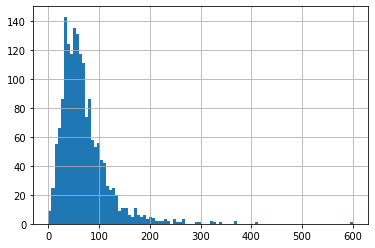

In [85]:
data['doc_words_count'].hist(bins=100)

In [93]:
data['section0'].values[0], df['section0'].values[0]

('Tasks, Folders, Projects and Spaces', 'Tasks, Folders, Projects and Spaces')

In [102]:
data_new['artlicle_link'].to_csv('data/wrike_faq_index.csv', index=False)

In [103]:
data_new

,page_id,section0,doc_id,section1_x,doc_text,doc_len,doc_words_count,keywords,Unnamed: 0,section1_y,text,artlicle_link,text_len,text_word_count,section2_header,section01_path
0,0,"Tasks, Folders, Projects and Spaces",0,Create a Task,"Tasks, Folders, Projects and Spaces\nCreate a ...",432,55,[],0.0,Tasks,Tasks\n \nFollow\n\n\n\nExternal and Re...,https://help.wrike.com/hc/en-us/articles/20960...,7134.0,1278.0,"[Create a Task, Assign a Task, Schedule a Task...","Tasks, Folders, Projects and Spaces/Tasks"
1,0,"Tasks, Folders, Projects and Spaces",0,Create a Task,"Tasks, Folders, Projects and Spaces\nCreate a ...",432,55,[],1.0,Tasks,Task View\n \nFollow\n\n\n\n⏱ 1 min rea...,https://help.wrike.com/hc/en-us/articles/21032...,623.0,80.0,[Navigate the Task View],"Tasks, Folders, Projects and Spaces/Tasks"
2,0,"Tasks, Folders, Projects and Spaces",0,Create a Task,"Tasks, Folders, Projects and Spaces\nCreate a ...",432,55,[],2.0,Tasks,Subtasks\n \nFollow\n\n\n\nSubtasks are...,https://help.wrike.com/hc/en-us/articles/21032...,7902.0,1421.0,"[Create a Subtask, View a Task's Subtasks, Edi...","Tasks, Folders, Projects and Spaces/Tasks"
3,0,"Tasks, Folders, Projects and Spaces",0,Create a Task,"Tasks, Folders, Projects and Spaces\nCreate a ...",432,55,[],3.0,Tasks,Subtask Alignment \n \nFollow\n\n\n\n⏱ ...,https://help.wrike.com/hc/en-us/articles/11500...,4649.0,776.0,"[Expanding Parent Task Dates, Shifting Task Da...","Tasks, Folders, Projects and Spaces/Tasks"
4,0,"Tasks, Folders, Projects and Spaces",0,Create a Task,"Tasks, Folders, Projects and Spaces\nCreate a ...",432,55,[],4.0,Tasks,Attachments\n \nFollow\n\n\n\nAll users...,https://help.wrike.com/hc/en-us/articles/20960...,8693.0,1463.0,"[Attach a File, Edit Attached Files, Create a ...","Tasks, Folders, Projects and Spaces/Tasks"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67599,10,Work Views,152,More Info,Work Views\nMore Info\nWhen to Use Which Work ...,76,13,"['When to Use Which Work View', 'Review, Appro...",95.0,Timelog View,Timelog View\n \nFollow\n\n\n\nThe Time...,https://help.wrike.com/hc/en-us/articles/21032...,6990.0,1172.0,"[Navigate the View, Edit and Delete Timelog En...",Work Views/Timelog View
67600,10,Work Views,152,More Info,Work Views\nMore Info\nWhen to Use Which Work ...,76,13,"['When to Use Which Work View', 'Review, Appro...",96.0,Timelog View,Categories for Time Tracking\n \nFollow...,https://help.wrike.com/hc/en-us/articles/11500...,2136.0,315.0,"[Add a Time Tracking Category, View and Apply ...",Work Views/Timelog View
67601,10,Work Views,152,More Info,Work Views\nMore Info\nWhen to Use Which Work ...,76,13,"['When to Use Which Work View', 'Review, Appro...",97.0,All the Other Views,Files View\n \nFollow\n\n\n\nThe Files ...,https://help.wrike.com/hc/en-us/articles/36000...,4290.0,724.0,"[When to Use the Files View, Navigate the View...",Work Views/All the Other Views
67602,10,Work Views,152,More Info,Work Views\nMore Info\nWhen to Use Which Work ...,76,13,"['When to Use Which Work View', 'Review, Appro...",98.0,All the Other Views,Board View\n \nFollow\n\n\n\nAll user t...,https://help.wrike.com/hc/en-us/articles/11500...,5383.0,895.0,"[How the Board View Works, Sorting and Filteri...",Work Views/All the Other Views


In [108]:
df.query('section1_x = "Create a Task"')

ValueError: cannot assign without a target object

In [120]:
data['keywords']

0                                                      []
1       ['invite a user to Wrike', 'email notification...
2       ['Wrike for Professional Services', 'Wrike Res...
3                                        ['mass actions']
4       ['Activity Stream', 'instant email notificatio...
                              ...                        
1732                                                   []
1733                                                   []
1734                                                   []
1735                                                   []
1736    ['When to Use Which Work View', 'Review, Appro...
Name: keywords, Length: 1737, dtype: object